In [23]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

C:\Users\rchoudhary\AppData\Local\Temp\ipykernel_20672\3251733192.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [24]:
import pandas as pd

red_wine = pd.read_csv('red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
red_wine.shape # (rows, columns)

(1599, 12)

In [26]:
input_shape = [11]

In [38]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

In [39]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense_3/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.661776  ],
       [-0.68062234],
       [ 0.37989336],
       [-0.11184525],
       [ 0.5779982 ],
       [-0.12668264],
       [ 0.5006338 ],
       [ 0.5033913 ],
       [-0.53116983],
       [-0.60080045],
       [ 0.379139  ]], dtype=float32)>

Bias
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [36]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [40]:
print(X_train.shape)

(1119, 11)


In [43]:
from tensorflow import keras
from keras import layers

model1 = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [45]:
model.compile(
    optimizer='adam',
    loss='mae',
)

We've told Keras to feed the optimizer 256 rows of the training data at a time (the batch_size) and to do that 10 times all the way through the dataset (the epochs).

In [47]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 0s 32ms/step - loss: 0.2807 - val_loss: 0.2704
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 0.2770 - val_loss: 0.2672
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 0.2737 - val_loss: 0.2643
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 0.2709 - val_loss: 0.2616
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 0.2681 - val_loss: 0.2591
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 0.2655 - val_loss: 0.2567
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.2630 - val_loss: 0.2544
Epoch 8/10
5/5 [==============================] - 0s 26ms/step - loss: 0.2606 - val_loss: 0.2522
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.2583 - val_loss: 0.2500
Epoch 10/10
5/5 [==============================] - 0s 16ms/step - loss: 0.2559 - val_loss: 0.2480


<Axes: >

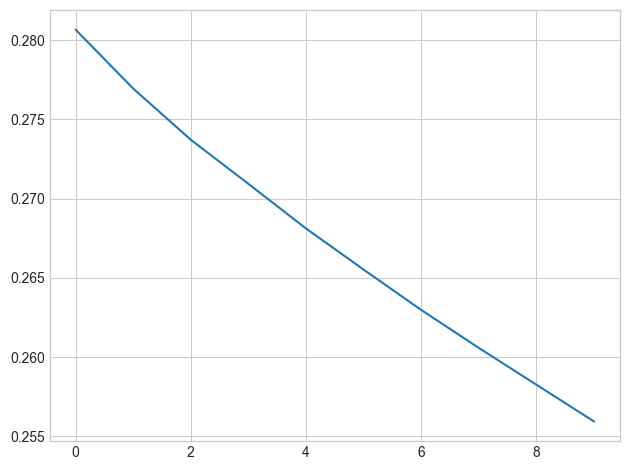

In [48]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()